In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [0]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 968us/step - loss: 0.3192 - acc: 0.9056 - val_loss: 0.0766 - val_acc: 0.9773
Epoch 2/10
60000/60000 [==============================] - 58s 969us/step - loss: 0.0773 - acc: 0.9767 - val_loss: 0.0560 - val_acc: 0.9830
Epoch 3/10
60000/60000 [==============================] - 57s 958us/step - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0345 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 58s 961us/step - loss: 0.0447 - acc: 0.9861 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 58s 970us/step - loss: 0.0363 - acc: 0.9887 - val_loss: 0.0266 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 58s 963us/step - loss: 0.0313 - acc: 0.9903 - val_loss: 0.0290 - val_acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 57s 957us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.

In [11]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.025077322926267517, 0.9922]


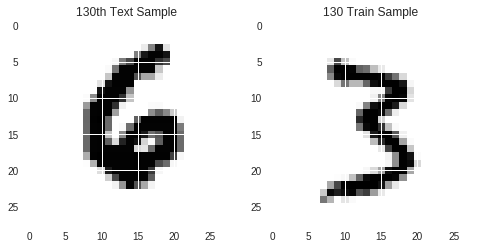

In [31]:
import matplotlib.pyplot as plt

img =  X_test[130]
img = img.reshape((28,28))
plt.subplot(121)
plt.imshow(img)
plt.title('130th Text Sample')
plt.subplot(122)
img1 =  X_train[130]
img1 = img1.reshape((28,28))
plt.imshow(img1)
plt.title('130 Train Sample')
plt.show()